#####**Background of the problem**
 The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it. The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

In [ ]:
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing file from a local folder
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
# read in the data set file to a housing dataframe

housing_df = pd.read_excel("/content/Dataset.xlsx")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#####1.A nominal variable is a variable that can take on one of a limited number of categories, such as "city" or "zipcode".
#####2. An ordinal variable is a variable that can take on one of a limited number of categories, and the categories have a natural ordering, such as "small","medium","large" .
#####3. A discrete variable is a variable that can take on a countable number of values, such as "number of bedrooms" or "number of rooms".
#####4. A continuous variable is a variable that can take on any value within a certain range, such as "median_income", "median_house_value", "total_rooms".
#####5. 'longitude' and 'latitude' are continuous variables.
#####6. 'median_income' is also a continuous variable.
#####7. 'housing_median_age' and 'total_rooms' are discrete variables
#####8. 'population' and 'households' are also discrete variables.
#####9. 'median_house_value' is a continuous variable
#####10. 'ocean_proximity' is a categorical variable, more specifically, it is a nominal variable.
#####11. 'total_bedrooms' is a discrete variable.

####**longitude-**	A measure of how far west a house is; a more negative value is farther west.
####**latitude-**	A measure of how far north a house is; a higher value is farther north.
####**housingMedianAge-**	Median age of a house within a block; a lower number is a newer building.
####**totalRooms-**	Total number of rooms within a block.
####**totalBedrooms-**	Total number of bedrooms within a block.
####**population-**	Total number of people residing within a block.
####**households-**	Total number of households, a group of people residing within a home unit, for a block.
####**medianIncome-**	Median income for households within a block of houses (measured in tens of thousands of US Dollars).
####**medianHouseValue-**	Median house value for households within a block (measured in US Dollars).


####**1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.**

In [ ]:
#Finding the average median income of the dataset.
housing_df['median_income'].median()

3.5347999999999997

In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


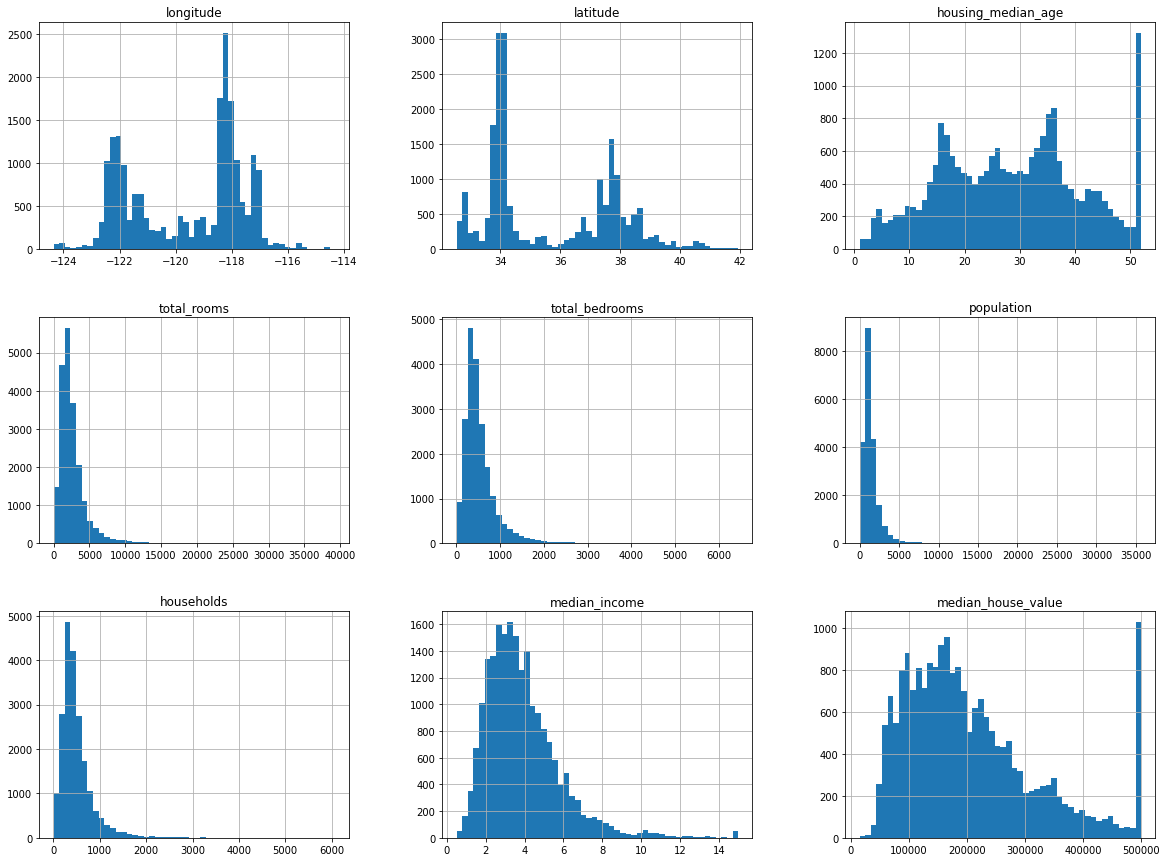

In [ ]:
#Checking the distribution of data using appropriate plots.
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

#####Explaining the distribution of the plots.
There are a few things you might notice in these histograms:
1. First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually, 15.0001) for higher median
incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000).

2. The housing median age and the median house value were also capped. The lat‐
ter may be a serious problem since it is your target attribute (your labels). 
Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond $500,000, then you have two options:

  a. Collect proper labels for the districts whose labels were capped.
  b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
$500,000).
3. These attributes have very different scales.
4. Finally, many histograms are tail-heavy: they extend much farther to the right of
the median than to the left.

####**2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**

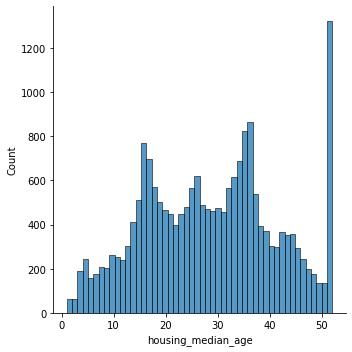

In [ ]:
#Plot to see the distribution of housing_median_age.
sns.displot(housing_df, x="housing_median_age", bins = 50)

#####**Observations from the distribution plot of housing_median_age:**
1. Firstly housing_median_age is the Median age of a house within a block; a lower number is a newer building.
2. Approximately 800,600,900 houses are having the median age of nearly about 15 years,25 years,37 years.
3. The density of median age in range (12-20) years is greater than median age in range (20-30) years which is less than median age in range (30-40) years which means there are more number of old houses.
4. There are around 1300 houses that are older than 50 years according to the graph.   
5. The minimum median age is 1 year and the maximum median age is 52 years.

####**3. Show with the help of visualization, how median_income and median_house_values are related?**

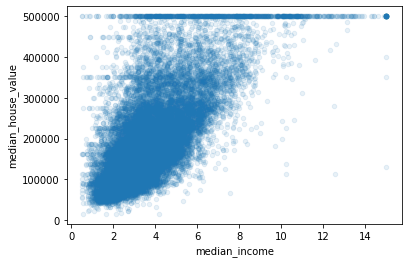

In [ ]:
#Relation between median_income and median_house_value.
housing_df.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

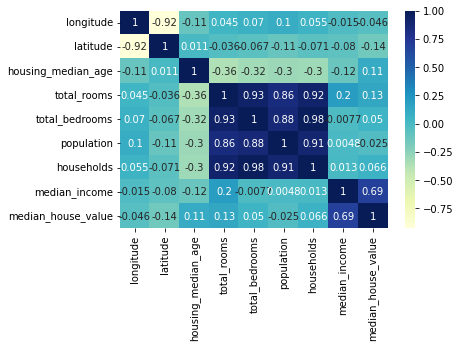

In [ ]:
sns.heatmap(housing_df.corr(),cmap="YlGnBu", annot=True)

In [ ]:
housing_df[['median_income','median_house_value']].corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


#####**Relation between median_income and median_house_values:**
1. The most promising attribute to predict the median house value is the median income.
2. The correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed.
3. The price cap that we noticed earlier is clearly visible as a horizontal line at $500,000.

4. But this plot reveals other less obvious straight lines: a horizontal line around 450,000 USD, 350,000 USD, perhaps one around 280,000 USD, and a few more below that.

####**4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**

In [ ]:
#Deleting the corresponding examples from the data set for which total_bedrooms are not available.
housing_df.dropna(subset=["total_bedrooms"]) #subsetcolumn label or sequence of labels, optional 
#Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing_df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:
#total_bedrooms having null values.
housing_df[housing_df.columns[housing_df.isnull().any()]].isnull().sum() 

total_bedrooms    207
dtype: int64

In [ ]:
#alternate way of finding how many values of total_bedrooms are null.
housing_df.total_bedrooms.isna().sum()

207

In [ ]:
housing_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
#percentage of total_bedrooms having null values.
housing_df[housing_df.columns[housing_df.isnull().any()]].isnull().sum()*100 / housing_df.shape[0]

total_bedrooms    1.002907
dtype: float64

####**5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**

In [ ]:
#First we will define mean and assign it to a string variable.
mean = housing_df["total_bedrooms"].mean()
mean

537.8705525375618

In [ ]:
#replace null values with mean value of the total_bedrooms in the original dataset.
housing_df["total_bedrooms"].fillna(mean, inplace=True)
housing_df.total_bedrooms

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


####**6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**

In [ ]:
def med(x):
    x = sorted(x)
    listlength = len(x) 
    num = listlength//2
    if listlength%2==0:
        middlenum = (x[num]+x[num-1])/2
    else:
        middlenum = x[num]
    return middlenum

In [ ]:
med(housing_df['total_rooms']) #median value of total_rooms is found out as there are outliers in the respective data.

2127.0

In [ ]:
med(housing_df['total_bedrooms'])  #median value of total_bedrooms is found out as there are outliers in the respective data.

438.0

In [ ]:
med(housing_df['population'])  #median value of population is found out as there are outliers in the respective data.

1166.0

In [ ]:
med(housing_df['households'])  #median value of households is found out as there are outliers in the respective data.

409.0

####**7. Plot latitude versus longitude and explain your observations.**

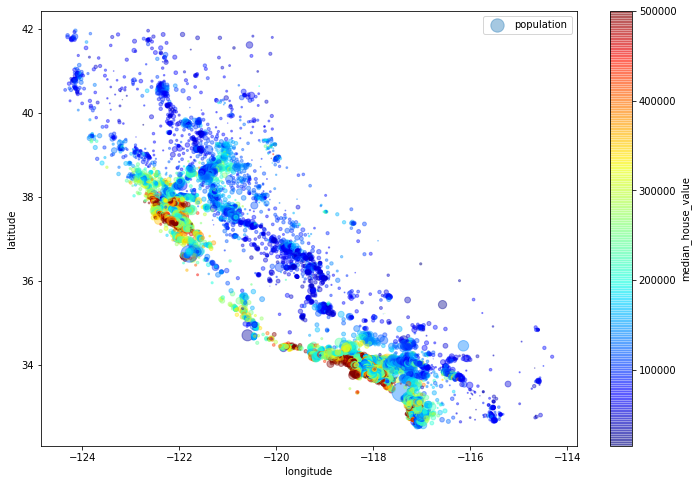

In [ ]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing_df["population"]/100, label="population", figsize=(12,8),
 c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)
plt.legend()

####**Observations:**
1. California housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population
2. This image tells you that the housing prices are very much related to the location(e.g., close to the ocean) and to the population density.
3. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. 
4. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

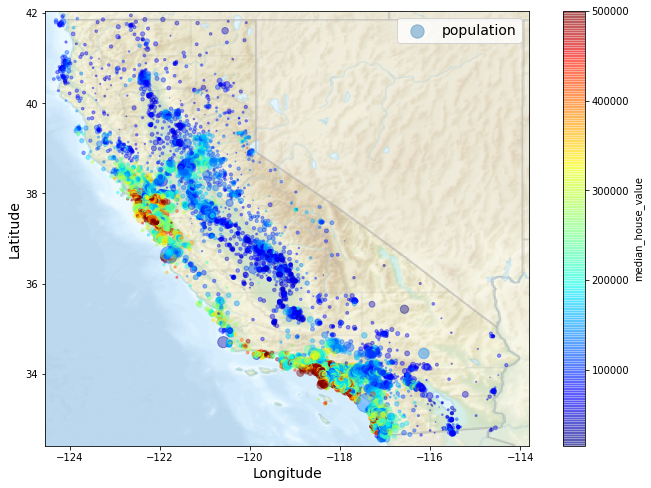

In [ ]:
import matplotlib.image as mpimg


ax=housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing_df["population"]/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

california_img=mpimg.imread("/content/Relief_map_of_California.png")

plt.imshow(california_img, extent=[-124.55,-113.8,32.4,42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()


####**8. Create a data set for which the ocean_proximity is ‘Near ocean’.**



In [ ]:
ocean_df=housing_df[housing_df['ocean_proximity']== 'NEAR OCEAN']
ocean_df  #new dataset after filtering ocean_proximity value for near ocean.

,total_bedroom_size,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,medium,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,medium,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,medium,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,medium,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
1854,medium,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
20380,medium,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN
20381,medium,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
20423,medium,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN
20424,large,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN


####**9. Find the mean and median of the median income for the data set created in question 8.**



In [ ]:
ocean_df['median_income'].mean()

4.0057848006019565

In [ ]:
ocean_df['median_income'].median()

3.64705

####**10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**

In [ ]:
housing_df["total_bedroom_size"] = None           #creating a new column total_bedroom_size in the housing_df dataframe and assigning column values to none. 
for j, i in enumerate(housing_df["total_bedrooms"]):           #Then taking data from total_bedrooms column and categorizing it into small,medium or large and storing the values in  
    if i < 10:                                                 #the total_bedroom_size column.
        housing_df["total_bedroom_size"][j] = "small" 
    elif i >= 11 and i< 1000:
        housing_df["total_bedroom_size"][j] = "medium"  
    else:
      housing_df["total_bedroom_size"][j] = "large" 

<ipython-input-37-2682f060125a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df["total_bedroom_size"][j] = "medium"
<ipython-input-37-2682f060125a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df["total_bedroom_size"][j] = "large"
<ipython-input-37-2682f060125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df["total_bedroom_size"][j] = "small"


In [ ]:
housing_df

,total_bedroom_size,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,medium,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,large,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,medium,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,medium,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,medium,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,medium,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,medium,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,medium,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,medium,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
